# Lisa confirmed that LPR for Phase I,II have two sets of timepoints 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, time

import warnings
warnings.filterwarnings('ignore')

In [2]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/1_reformat/all_targets/LPR/divide_into_two_sets


### Reformat LPR behavioral data

In [8]:
## mac - phase I,II - LPR - before_Lisa_plate_id_fix
#complete_input_file_path= '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/tall/before_Lisa_plate_id_fix/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall.csv'
# 344 unique chemical.IDs

## mac - phase I,II - LPR - after_Lisa_plate_id_fix
complete_input_file_path= '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/tall/after_Lisa_plate_id_fix/original/149_Toxcast_zf_LPR_data_phase_2_2021APR09.csv'
# 149 unique chemical.IDs

## constance - phase I,II - LPR
#complete_input_file_path = '/people/kimd999/tox/phase_I_II/data/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX.csv'


behav_all_data = pd.read_csv(complete_input_file_path, header = 0)
#behav_all_data.head()

In [9]:
chemical_id_count = 0
for chemical_id in np.unique(behav_all_data['chemical.id']):
    chemical_id_count += 1
print ("chemical_id_count:"+str(chemical_id_count))

chemical_id_count:149


In [6]:
#len(behav_all_data)

In [7]:
#TX_bottle_id_behav_all_data = behav_all_data[behav_all_data['bottle.id'].str.contains("^TX")]
#TX_bottle_id_behav_all_data.head()

In [8]:
#len(TX_bottle_id_behav_all_data)

In [9]:
##### (start) replace plate.id in behavioral data with plate.id in morphological data (common data will be bottle.id)

#mac
#complete_morph_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/Phase_I_II/input/morphology/tall/zf_morphology_data_335_chemicals_2020DEC16.csv'

#constance
#complete_morph_file_path = '/people/kimd999/tox/phase_I_II_close_file_frequently/data/zf_morphology_data_335_chemicals_2020DEC16.csv'

#morph_all_data = pd.read_csv(complete_morph_file_path, header = 0)
#morph_all_data.head()

In [10]:
'''chemical_id_count = 0
for chemical_id in np.unique(morph_all_data['chemical.id']):
    chemical_id_count += 1
print ("chemical_id_count:"+str(chemical_id_count))
'''

'chemical_id_count = 0\nfor chemical_id in np.unique(morph_all_data[\'chemical.id\']):\n    chemical_id_count += 1\nprint ("chemical_id_count:"+str(chemical_id_count))\n'

In [11]:
#len(morph_all_data)

In [12]:
#TX_bottle_id_morph_all_data = morph_all_data[morph_all_data['bottle.id'].str.contains("^TX")]
#TX_bottle_id_morph_all_data.head()

In [13]:
#len(TX_bottle_id_morph_all_data)

In [14]:
#new_behav_all_data = TX_bottle_id_behav_all_data.loc[TX_bottle_id_morph_all_data['bottle.id'],['chemical.id', 'bottle.id', 'conc', 'plate.id', 'well', 'endpoint', 'value']]

In [15]:
##### (end) replace plate.id in behavioral data with plate.id in morphological data (common data will be bottle.id)

In [16]:
#new_behav_all_data = behav_all_data.loc[behav_all_data['bottle.id'] == "TX002271",['chemical.id', 'bottle.id', 'conc', 'plate.id', 'well', 'endpoint', 'value']]

In [17]:
#new_behav_all_data.head()

In [18]:
# Keep only relevant columns
columns_to_keep = ['chemical.id', 'conc', 'plate.id', 'well', 'endpoint', 'value']
behav_all_data_select = behav_all_data.loc[:,columns_to_keep]
behav_all_data_select.head()

,chemical.id,conc,plate.id,well,endpoint,value
0,2752,0.64,2.0,B3,t3,0.4
1,2752,0.64,1.0,F3,t3,0.0
2,2752,6.40,2.0,B8,t3,37.5
3,2752,0.64,1.0,C3,t3,0.0
4,2752,0.64,2.0,F3,t3,0.0


In [19]:
chemical_id_count = 0
for chemical_id in np.unique(behav_all_data_select['chemical.id']):
    chemical_id_count += 1
print ("chemical_id_count:"+str(chemical_id_count))

chemical_id_count:344


In [20]:
#display(np.unique(behav_all_data['endpoint']))

In [21]:
#display(np.unique(behav_all_data_select['endpoint']))

In [22]:
#reformat_data.head()

In [23]:
#reformat_data.shape

In [24]:
#reformat_data.to_csv('Phase_I_II_t3_t17_LPR.csv',index=False)

In [25]:
###### replace plate id with what is listed in the morphology data to the LPR.
###### for your example, TP967-E9-P1, will go in place of plate.id “1” in the LPR file.

# read morpho data and match/join


### t0_t239 time points

Done, it took:95.9 seconds


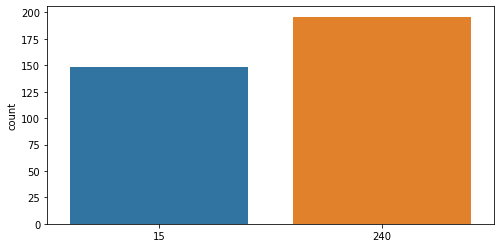

In [26]:
start_time = time.time()

behav_data_chemical_w_240_endpoints = pd.DataFrame()
behav_data_chemical_w_15_endpoints = pd.DataFrame()
    
len_endpoint = []
    
full_devel = "full"
#full_devel = "devel"

chemical_id_from_here = np.unique(behav_all_data['chemical.id'])
if (full_devel == "devel"):
    randomly_chosen = random.sample(set(chemical_id_from_here), 1)
    chemical_id_from_here = []
    for i in range(len(randomly_chosen)):
        chemical_id_from_here.append(randomly_chosen[i])
        
    
for chemical_index in chemical_id_from_here:
    behav_data_chemical = behav_all_data_select.loc[behav_all_data['chemical.id'] == chemical_index,:]
#    print("chemical_index:" + str(chemical_index))

    if (len(np.unique(behav_data_chemical['endpoint'])) == 240):
        behav_data_chemical_w_240_endpoints = pd.concat([behav_data_chemical_w_240_endpoints, behav_data_chemical])
    else:
        behav_data_chemical_w_15_endpoints = pd.concat([behav_data_chemical_w_15_endpoints, behav_data_chemical])
    len_endpoint.append(len(np.unique(behav_data_chemical['endpoint'])))


end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) 
# took 2 minutes for 2 chemicals

ds = pd.Series({"Column": len_endpoint})
plt.figure(figsize=(8,4))
sns.countplot(x="Column", data=ds)
plt.show()

In [ ]:
display(behav_data_chemical_w_240_endpoints)
display(behav_data_chemical_w_15_endpoints)

In [27]:
reformatted_data_filename = str(complete_input_file_path[:-4]) + "_" + str(full_devel) + "_w_240_endpoints.csv"
print ("reformatted_data_filename:"+str(reformatted_data_filename))
behav_data_chemical_w_240_endpoints.to_csv(reformatted_data_filename,index=False)

In [28]:
reformatted_data_filename = str(complete_input_file_path[:-4]) + "_" + str(full_devel) + "_w_15_endpoints.csv"
print ("reformatted_data_filename:"+str(reformatted_data_filename))
behav_data_chemical_w_15_endpoints.to_csv(reformatted_data_filename,index=False)

In [37]:
display(len(np.unique(behav_data_chemical_w_240_endpoints['chemical.id'])))

display(len(np.unique(behav_data_chemical_w_15_endpoints['chemical.id'])))

196

148